In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
START_AGE = 0
END_AGE = 100
RATE = 0.05
START_SALARY = 100000
INFLATION_RATE = 0.03

In [3]:
def inflation_growth(start_age, end_age, start_salary, inflation_rate):
    cash_flow = []
    for i, age in enumerate(range(START_AGE, END_AGE)):
        value = start_salary
        if len(cash_flow) > 0:
            value = cash_flow[i-1]*(1+inflation_rate)
        cash_flow.append(value)
    return cash_flow
years = range(START_AGE, END_AGE)
cash_flow = [START_SALARY*(1+INFLATION_RATE)**year for year in years]
df = pd.DataFrame({'Year':years, "cash_flow":cash_flow})
df["pv"] = df['cash_flow'] / (1.0 + RATE)**df['Year']
npv = df["pv"].sum()

In [4]:
df.pv.cumsum()

0     1.000000e+05
1     1.980952e+05
2     2.943220e+05
3     3.887159e+05
4     4.813118e+05
          ...     
95    4.421371e+06
96    4.437154e+06
97    4.452637e+06
98    4.467825e+06
99    4.482724e+06
Name: pv, Length: 100, dtype: float64

In [5]:
npv

4482723.5529760225

In [6]:
cash_flow[-1]

1865886.6000831355

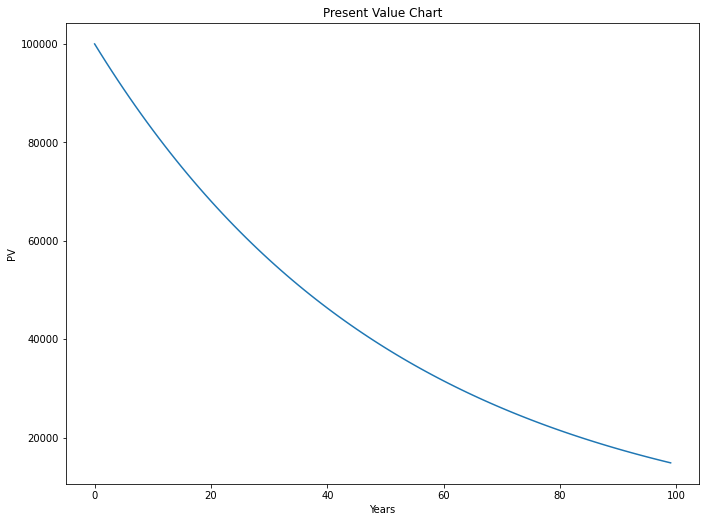

In [8]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(df["Year"],df["pv"])
ax1.set_xlabel('Years') # Notice the use of set_ to begin methods
ax1.set_ylabel('PV')
ax1.set_title('Present Value Chart')
plt.show()

In [9]:
df.iplot(x='Year', y='pv', kind='line')

In [1]:
#### Assumptions
INFLATION_RATE = 0.0220
GROWTH_RATE = 0.0350
SALARY_GROWTH_RATE = 0.0300

#### INPUTS
AGE = 32
MORTALITY_AGE = 95
PERCENT_INCOME_NEEDED = [0.50]*(MORTALITY_AGE - AGE)
CURRENT_SALARY = 120000
RETIREMENT_AGE = 60

In [7]:
def create_net_salary_needed(age, current_salary, retirement_age, mortality_age, income_needed_array, salary_growth_rate=SALARY_GROWTH_RATE):
    net_salary_array = []
    year_index = 0
    while age < mortality_age:
        salary_needed = 0
        if len(net_salary_array) == 0:
            salary_needed = current_salary*(1+salary_growth_rate)*income_needed_array[year_index]
        elif age <= retirement_age:
            salary_needed = net_salary_array[year_index-1]*(1+salary_growth_rate)
        net_salary_array.append(salary_needed)
        year_index += 1
        age += 1
    return net_salary_array

net_salary_needed = create_net_salary_needed(AGE, CURRENT_SALARY, RETIREMENT_AGE, MORTALITY_AGE, PERCENT_INCOME_NEEDED)

In [12]:
## TODO: work out how to make this more efficient
def create_income_replacement(age, retirement_age, mortality_age, net_salary_needed, growth_rate=GROWTH_RATE):
    income_replacement_array = []
    
    for age_index, salary_needed in enumerate(net_salary_needed):
        fv_cumsum = 0
        for j in range(age_index+1,(mortality_age-age)):
            fv_cumsum += net_salary_needed[j] / (1+growth_rate)**(j-age_index)
        income_replacement = salary_needed + fv_cumsum
        income_replacement_array.append(income_replacement)
    return income_replacement_array

income_replacement_array = create_income_replacement(AGE, RETIREMENT_AGE, MORTALITY_AGE, net_salary_needed)

In [17]:
# SIMPLY COMPUTE THE FUTURE VALUE ARRAY
def create_bequest_array_lump_sum(bequest_value, age, start_age, end_age, inflation_rate=INFLATION_RATE):
    bequests = []
    current_age = age
    while current_age < end_age:
        print(current_age)
        if current_age > start_age and current_age < end_age:
            bequests.append(bequest_value*(1+inflation_rate)**(current_age-age) )
        else:
            bequests.append(0)
        current_age += 1
    return bequests
create_bequest_array_lump_sum(40000,AGE, 33, 95)

32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


[0,
 0,
 41779.36,
 42698.50592,
 43637.87305024,
 44597.90625734528,
 45579.06019500688,
 46581.799519297034,
 47606.599108721566,
 48653.944289113446,
 49724.33106347395,
 50818.26634687037,
 51936.26820650152,
 53078.86610704455,
 54246.60116139953,
 55440.026386950325,
 56659.70696746324,
 57906.220520747425,
 59180.15737220387,
 60482.12083439236,
 61812.72749274899,
 63172.607497589466,
 64562.40486253644,
 65982.77776951223,
 67434.39888044151,
 68917.95565581122,
 70434.15068023908,
 71983.70199520433,
 73567.34343909883,
 75185.82499475901,
 76839.91314464371,
 78530.39123382587,
 80258.05984097005,
 82023.73715747138,
 83828.25937493575,
 85672.48108118435,
 87557.2756649704,
 89483.53572959975,
 91452.17351565094,
 93464.12133299527,
 95520.33200232117,
 97621.77930637223,
 99769.45845111243,
 101964.3865370369,
 104207.60304085171,
 106500.17030775045,
 108843.17405452096,
 111237.72388372042,
 113684.95380916228,
 116186.02279296386,
 118742.11529440906,
 121354.4418308860

In [ ]:
def analysis(insurance_need_array):
    

    for j, insurance_need in enumerate(insurance_need_array):
        if j < 10:
            val = if t_10average[0:10]
            pass
        elif j < 20:
            pass
        elif j < 30:
            pass
        else:
            pass
        result
        =IF(M$34 = 1, AVERAGE(C9:C19), IF(M$35 = 1, AVERAGE(C9:C29), IF(M$36 = 1, AVERAGE(C9:C39), IF(M$37 = 1, AVERAGE(
            C9:C71), 0))))
        pass
